In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 3.1. Kernel PCA: Toy Data.

### a) Create dataset.

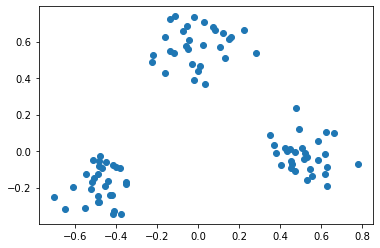

In [2]:
mu_1 = np.array([-0.5,-0.2]).T
mu_2 = np.array([0,0.6]).T
mu_3 = np.array([0.5,0]).T
var = 0.1**2
num = 30

n_1=np.random.multivariate_normal(mu_1,np.identity(2)*var,num)
n_2=np.random.multivariate_normal(mu_2,np.identity(2)*var,num)
n_3=np.random.multivariate_normal(mu_3,np.identity(2)*var,num)

n = np.vstack((n_1,n_2))
n = np.vstack((n,n_3))

plt.scatter(n[:,0],n[:,1]);

### b) Apply Kernel PCA ussing a RBF Kernel.

In [8]:
def rbf(data_1,data_2,var):
    return np.exp(-np.sum(np.abs(data_1-data_2),axis=0)**2/(2*var))

def kernel(x,var):
    p = x.shape[0]
    kern = np.zeros((p,p))
    for i in range(0,p):
        for j in range(0,p):
            kern[i,j] = rbf(x[i,:],x[j,:],var)
            
    # Centering
    
    kern -= np.mean(kern,axis=0)
    kern = (kern.T - (np.mean(kern,axis=1)).T).T
    kern += np.mean(kern)/(p**2)   
    
    return kern

def PC_sort(matrix):
    eig_val, eig_vec = np.linalg.eig(matrix)
    idx = np.argsort(eig_val, axis = 0)[::-1]
    sorted_PC = eig_vec[:,idx].T
    return sorted_PC,eig_val[idx],idx

def kernel_2v(x,y,var):
    p = x.shape[0]
    m = y.shape[0]
    kern = np.zeros((p,m))
    for i in range(0,p):
        for j in range(0,m):
            kern[i,j] = rbf(x[i,:],y[j,:],var)
            
    # Centering
    
    kern -= np.mean(kern,axis=0)
    kern = (kern.T - (np.mean(kern,axis=1)).T).T
    kern += np.mean(kern)/(p**2)   
    
    return kern

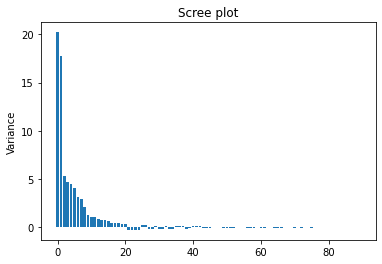

In [6]:
gamma = 0.05
Kern = kernel(n,gamma)
eig_vec,eig_val,idx = PC_sort(Kern)

plt.bar(idx,eig_val)
plt.title('Scree plot')
plt.ylabel('Variance');

### c) Visualize the ﬁrst 8 PCs in the original 2-dimensional input space.

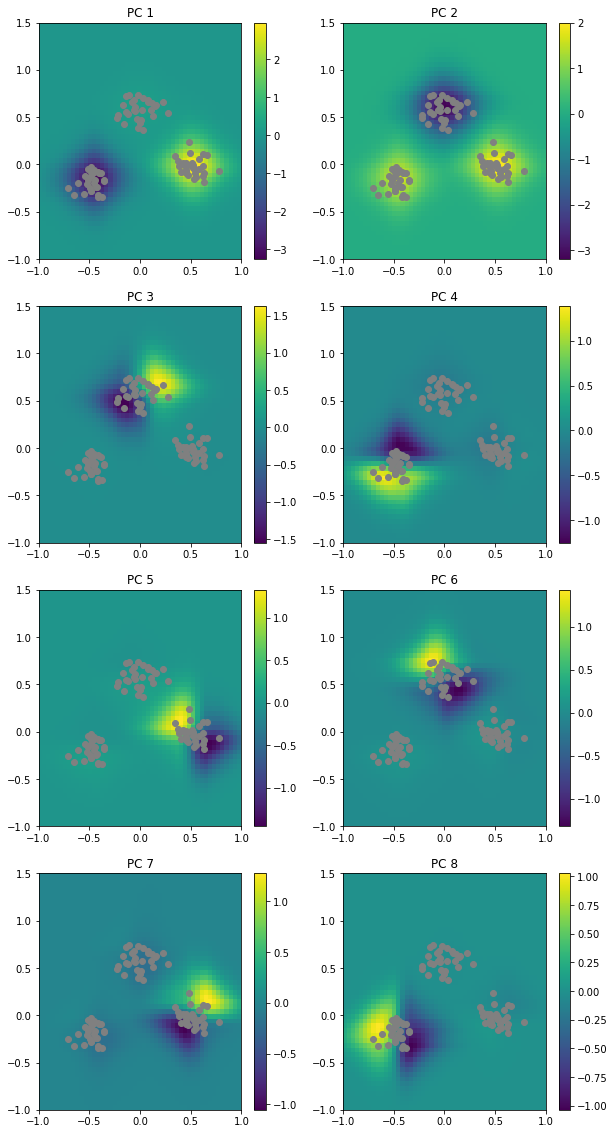

In [10]:
eig_v = eig_vec[0:8]

num_points=50
x=np.linspace(-1,1,num_points)
y=np.linspace(-1,1.5,num_points)
xx, yy= np.array(np.meshgrid(x,y))
points_grid=np.c_[xx.ravel(),yy.ravel()]

Kern_n2 = kernel_2v(n,points_grid,gamma)
labels = eig_v @ Kern_n2

labels_x = eig_v @ Kern

fig = plt.figure(figsize=(10,20))

for i in range(0,labels.shape[0]):
    
    values = labels[i,:].reshape((num_points,num_points))
    
    fig.add_subplot(4,2,i+1)
    L = plt.pcolormesh(xx,yy,values,shading='flat')
    plt.title(f'PC {i+1}')
    plt.colorbar(L)
    plt.scatter(n[:,0],n[:,1],marker='o',color='gray')

#### (v) How do you interpret the results? What kind of roles do the different PCs play?

The PC's are separating the data into 3 different groups (according to the three different distributions).

#### (vi) Discuss suitable applications for Kernel PCA.

It can be used for novelty-detection, cluster-detection or image de-noising among others.